# Feature Visualization
- This notebook does basic feature visualization of David Parks DLA CNN Model

## Install imports, define and load model

In [2]:
# Imports

import numpy as np
import tensorflow as tf
import scipy.ndimage as nd
import time
import imageio

import matplotlib
import matplotlib.pyplot as plt

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

from lucid.optvis.objectives import wrap_objective, _dot, _dot_cossim
from lucid.optvis.transform import standard_transforms, crop_or_pad_to, pad, jitter, random_scale, random_rotate

In [3]:
from lucid.modelzoo.vision_base import Model

class DLA(Model):
    model_path = '../protobufs/full_model_8_13.pb'
    image_shape = [1, 400]
    image_value_range = [0, 1]
    input_name = 'x'

In [4]:
model = DLA()
model.load_graphdef()

In [5]:
LAYERS = { 'conv1': ['Conv2D', 100],
           'conv1_relu': ['Relu', 100],
           'pool1': ['MaxPool', 100],
           'conv2': ['Conv2D_1', 96],
           'conv2_relu': ['Relu_1', 96],
           'pool2': ['MaxPool_1', 96],
           'conv3': ['Conv2D_2', 96],
           'conv3_relu': ['Relu_2', 96],
           'pool3': ['MaxPool_2', 96]}

## Simple 3D Visualizations of a neuron
- Create 3D visualizations

1 0.0



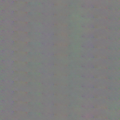

2 0.0



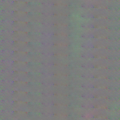

4 0.0



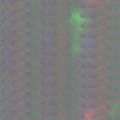

8 0.0012843315



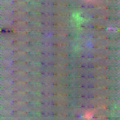

16 0.018283095



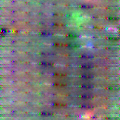

32 0.090532474



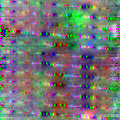

64 0.2393728



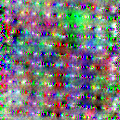

128 0.5991768



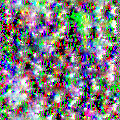

256 1.0166932



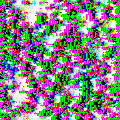


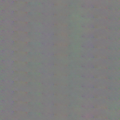
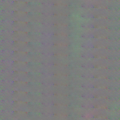
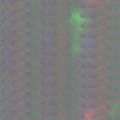
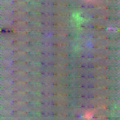
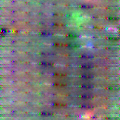
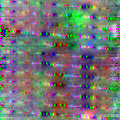
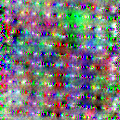
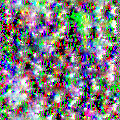
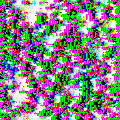

In [7]:
# Specify param.image size to work with our models input, must be a multiple of 400.
param_f = lambda: param.image(120, h=120, channels=3)

# std_transforms = [
#     pad(2, mode="constant", constant_value=.5),
#     jitter(2)]
# transforms = std_transforms + [crop_or_pad_to(*model.image_shape[:2])]
transforms = []

# Specify the objective

# neuron = lambda n: objectives.neuron(LAYERS['pool1'][0], n)
# obj = neuron(0)
channel = lambda n: objectives.channel(LAYERS['pool1'][0], n)
obj = channel(0)

# Specify the number of optimzation steps, will output image at each step
thresholds = (1, 2, 4, 8, 16, 32, 64, 128, 256, 512)


# Render the objevtive
imgs = render.render_vis(model, obj, param_f, thresholds=thresholds, transforms=transforms)
show([nd.zoom(img[0], [1,1,1], order=0) for img in imgs])

# test = np.array(imgs)
# test = test.reshape(400)
# test = test[0:400:1]

# fig = plt.figure(frameon=False);
# ax = plt.Axes(fig, [0, 0, 1, 1]);
# ax.set_axis_off();
# fig.add_axes(ax);
# ax.plot(test, 'black');
# ax.set(xlim=(0, 400));
# ax.set(ylim=(0,1))

# Simple 1D visualizations

[(0, 1)]

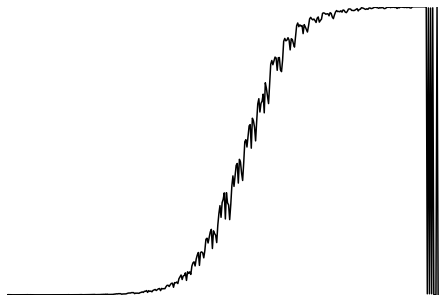

In [11]:
# Specify param.image size
param_f = lambda: param.image(400, h=1, channels=1)

transforms = []

# Specify the objective

# neuron = lambda n: objectives.neuron(LAYERS['pool1'][0], n)
# obj = neuron(0)
channel = lambda n: objectives.channel(LAYERS['pool1'][0], n)
obj = channel(0)

# Specify the number of optimzation steps,
thresholds = (128,)


# Render the objevtive
imgs = render.render_vis(model, obj, param_f, thresholds=thresholds, transforms=transforms, verbose=False)

# Display visualization

test = np.array(imgs)
test = test.reshape(400)
test = test[0:400:1]

fig = plt.figure(frameon=False);
ax = plt.Axes(fig, [0, 0, 1, 1]);
ax.set_axis_off();
fig.add_axes(ax);
ax.plot(test, 'black');
ax.set(xlim=(0, 400));
ax.set(ylim=(0,1))